In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import time

#pd.set_option('display.float_format', '{:.2f}'.format)


In [2]:
#Cargo los sets
X_train = pd.read_csv('data/X_train.csv', dtype={'id':'int',\
                                           'tipodepropiedad':'category',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool'\
                                           }, index_col='id')
y_train = pd.read_csv('data/y_train.csv',header=None,squeeze=True,index_col=0)
X_test = pd.read_csv('data/X_test.csv', dtype={'id':'int',\
                                           'tipodepropiedad':'category',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool'\
                                           }, index_col='id')
y_test = pd.read_csv('data/y_test.csv',header=None,squeeze=True,index_col=0)
X_train_ohc = pd.read_csv('data/X_train_ohc.csv', dtype={'id':'int',\
                                           'tipodepropiedad':'category',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool'\
                                           }, index_col='id')
X_test_ohc = pd.read_csv('data/X_test_ohc.csv', dtype={'id':'int',\
                                           'tipodepropiedad':'category',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool'\
                                           }, index_col='id')

In [64]:
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

XGBoost

Primer XGBoost


In [21]:
xg_reg = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10,
                                     max_depth=5, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [22]:
#Sin tomar en cuenta las variables categoricas

In [23]:
X_train.drop(['tipodepropiedad','ciudad','provincia'],axis=1,inplace=True)
X_test.drop(['tipodepropiedad','ciudad','provincia'],axis=1,inplace=True)

In [24]:
start_time = time.time()

xg_reg.fit(X_train,y_train)
preds_test = xg_reg.predict(X_test)
preds_train = xg_reg.predict(X_train)

rmsle_test = RMSLE(y_test,preds_test)
rmsle_train = RMSLE(y_train,preds_train)

print("Sin variables categoricas")
print("-------------------------------")
print("RMSLE test : %f" % (rmsle_test))
print("-------------------------------")
print("RMSLE train: %f" % (rmsle_train))

end_time = time.time()
print("Total execution time: {}".format(end_time - start_time))

Sin variables categoricas
-------------------------------
RMSLE test : 2.208395
-------------------------------
RMSLE train: 2.211680
Total execution time: 1.1530780792236328


In [25]:
#Tomando en cuenta las variables categoricas con One-Hot-Encoding


In [26]:
start_time = time.time()

xg_reg.fit(X_train_ohc,y_train)
preds_test = xg_reg.predict(X_test_ohc)
preds_train = xg_reg.predict(X_train_ohc)

rmsle_test = RMSLE(y_test,preds_test)
rmsle_train = RMSLE(y_train,preds_train)

print("Con variables categoricas")
print("RMSLE test: %f" % (rmsle_test))
print("-------------------------------")
print("RMSLE train: %f" % (rmsle_train))

end_time = time.time()
print("Total execution time: {}".format(end_time - start_time))

Con variables categoricas
RMSLE test: 2.225365
-------------------------------
RMSLE train: 2.228507
Total execution time: 33.891019344329834


In [32]:
#Los valores que mas afectaban al modelo eran el learning rate, la cantidad
#de estimadores y el depth de los arboles

In [60]:
#Con los 50 features mas importantes
xg_reg = xgb.XGBRegressor(learning_rate=0.01,n_estimators=1000,
                                     max_depth=5, min_child_weight=2,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=5,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [51]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

def RMSE(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [61]:
features_n = pd.read_csv('data/features_importancia_primera_etapa.csv',index_col=0).head(50)\
            .index.tolist()

In [62]:
X_train_ohc_n = X_train_ohc[features_n]
X_test_ohc_n = X_test_ohc[features_n]

In [65]:
start_time = time.time()

xg_reg.fit(X_train_ohc_n,y_train_log)
preds_test = xg_reg.predict(X_test_ohc_n)
preds_train = xg_reg.predict(X_train_ohc_n)

rmse_test = RMSE(y_test_log,preds_test)
rmse_train = RMSE(y_train_log,preds_train)

print("Con n variables categoricas")
print("-------------------------------")
print("RMSE test : %f" % (rmse_test))
print("-------------------------------")
print("RMSE train: %f" % (rmse_train))

end_time = time.time()
print("Total execution time: {}".format(end_time - start_time))

Con n variables categoricas
-------------------------------
RMSE test : 0.389060
-------------------------------
RMSE train: 0.387308
Total execution time: 107.63201832771301


In [58]:
#0.344451 con 50 y 2000 estimadores
#0.362292 con 100 y 1000 estimadores
#0.344498 con 100 y 2000 estimadores 5 minutos

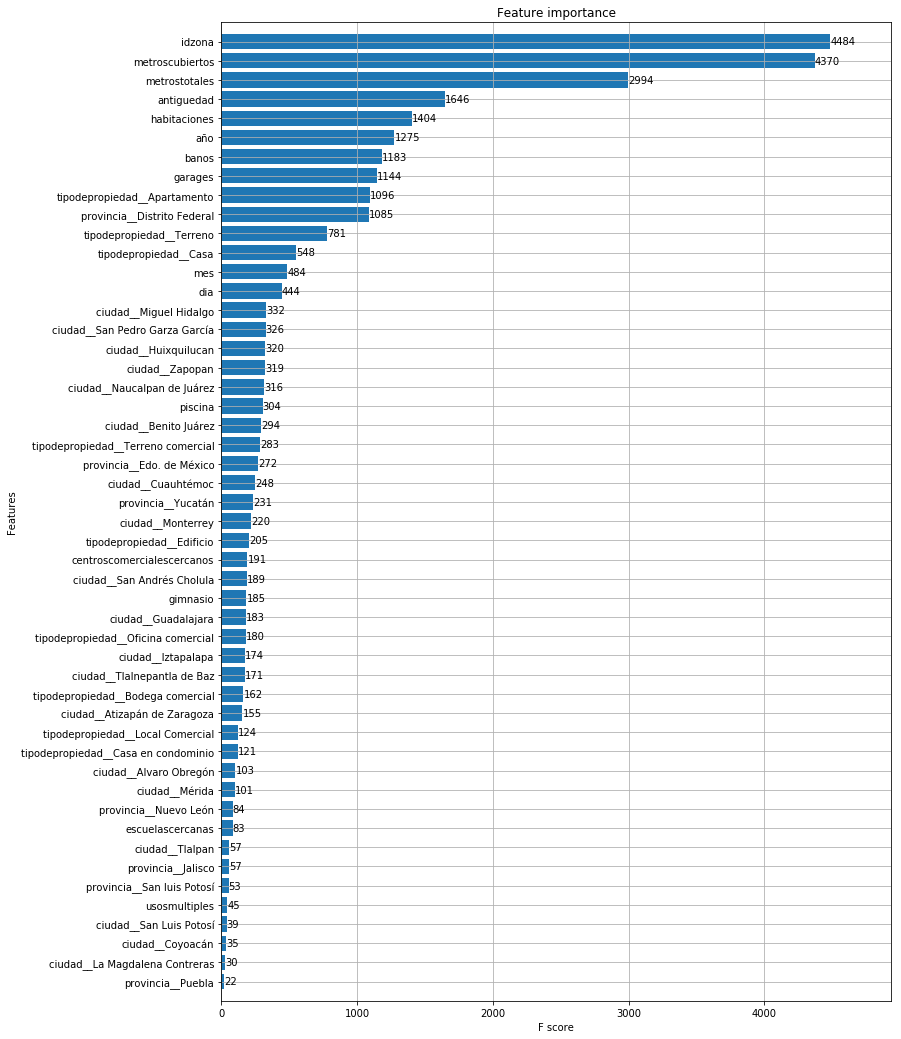

In [57]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xg_reg, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [59]:
features_n

['metroscubiertos',
 'metrostotales',
 'banos',
 'provincia__Distrito Federal',
 'idzona',
 'tipodepropiedad__Apartamento',
 'garages',
 'año',
 'antiguedad',
 'dia',
 'ciudad__Huixquilucan',
 'habitaciones',
 'mes',
 'ciudad__San Pedro Garza García',
 'tipodepropiedad__Terreno',
 'tipodepropiedad__Casa',
 'ciudad__Miguel Hidalgo',
 'provincia__Edo. de México',
 'ciudad__Naucalpan de Juárez',
 'ciudad__Zapopan',
 'ciudad__Benito Juárez',
 'ciudad__Cuauhtémoc',
 'centroscomercialescercanos',
 'escuelascercanas',
 'tipodepropiedad__Terreno comercial',
 'gimnasio',
 'tipodepropiedad__Casa en condominio',
 'tipodepropiedad__Edificio',
 'piscina',
 'ciudad__San Andrés Cholula',
 'provincia__Jalisco',
 'provincia__Yucatán',
 'provincia__Nuevo León',
 'ciudad__Atizapán de Zaragoza',
 'ciudad__Alvaro Obregón',
 'usosmultiples',
 'ciudad__Mérida',
 'ciudad__Iztapalapa',
 'ciudad__Monterrey',
 'ciudad__Tlalpan',
 'ciudad__Coyoacán',
 'tipodepropiedad__Bodega comercial',
 'ciudad__Guadalajara',
 

In [ ]:
#Se puede ver que el orden de importancia es masomenos parecido